In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import os
import pickle
import torchvision
import torchvision.transforms as transforms
from models import resnet

from torchvision.datasets.cifar import CIFAR10

In [72]:
with open('D:\CASIA\code_cc_misd\loss_trained.pkl', 'rb') as f:
    file1 = pickle.load(f)
file1[:15]

[4.672895e-05,
 0.0038594536,
 0.0010078833,
 0.00073429797,
 0.0006922471,
 0.0016427845,
 0.000102753125,
 0.0013155624,
 0.00036793138,
 0.0005843124,
 0.00086901564,
 0.0019085065,
 0.0067123887,
 1.1765132,
 0.026078178]

In [74]:
with open('D:\CASIA\code_cc_misd\loss_trained_new.pkl', 'rb') as f:
    file2 = pickle.load(f)
file2[:15]

[]

In [8]:
# class_names[:16]

[4.672895e-05,
 0.0038594536,
 0.0010078833,
 0.00073429797,
 0.0006922471,
 0.0016427845,
 0.000102753125,
 0.0013155624,
 0.00036793138,
 0.0005843124,
 0.00086901564,
 0.0019085065,
 0.0067123887,
 1.1765132,
 0.026078178,
 0.0043761204]

In [61]:
from typing import Any, Callable, Optional, Tuple
from PIL import Image

class CIFAR10_loss(CIFAR10):
    def __init__(
        self,
        root: str,
        train: bool = True,
        transform: Optional[Callable] = None,
        target_transform: Optional[Callable] = None,
        download: bool = False,
        loss_dir : str = None,
        cut_rate: float = 0.0,
    ) -> None:

        super().__init__(root, transform=transform, target_transform=target_transform)
        
        self.losses = None
        if loss_dir is not None:
            self.losses = []
            with open(loss_dir, 'rb') as f:
                self.losses = pickle.load(f)
        
            if cut_rate > 0:
                # cut the loss by the value of loss, drop the least loss
                print('use cut_rate: ', cut_rate)
                loss_sort = np.sort(self.losses)
                cut_index = int(len(loss_sort) * cut_rate)
                self.save_index = [self.losses.index(value) for value in loss_sort[cut_index:]]
                self._refresh_data()
                
    def _refresh_data(self):
        self.data = [self.data[i] for i in self.save_index]
        self.targets = [self.targets[i] for i in self.save_index]
        # if self.losses is not None:
        self.losses = [self.losses[i] for i in self.save_index]
        
        print('refresh data', len(self.data), len(self.targets), len(self.losses))
                
            
    
    def __getitem__(self, index: int) -> Tuple[Any, Any]:
        """
        Args:
            index (int): Index

        Returns:
            tuple: (image, target, loss) where target is index of the target class.
        """
        
        img, target = self.data[index], self.targets[index]

        img = Image.fromarray(img)
        img.save('./temp.jpg')
        print('save img', img.size, img.mode, target)
        # doing this so that it is consistent with all other datasets
        # to return a PIL Image
        # img = Image.fromarray(img)

        if self.transform is not None:
            img = self.transform(img)
        # print('target', target)
        if self.target_transform is not None:
            target = self.target_transform(target)
            # print('target', target)
        if self.losses is not None:
            loss = self.losses[index]

            return img, target, loss
        else:
            return img, target
        
        

In [66]:
data_dir = 'data/res18-2/'
transform_train = transforms.Compose([transforms.ToTensor(),])
loss_dir = 'D:\CASIA\code_cc_misd\loss_trained.pkl'
trainset_cut = CIFAR10_loss(root=data_dir, train=True, download=True, transform=transform_train, loss_dir=loss_dir, cut_rate=0.95)


use cut_rate:  0.95
refresh data 2500 2500 2500


In [50]:
trainset_cut.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [71]:
trainset_cut.__getitem__(2390)

save img (32, 32) RGB 8


(tensor([[[1.0000, 0.6941, 0.2824,  ..., 0.0078, 0.0000, 0.0000],
          [1.0000, 0.7137, 0.4314,  ..., 0.0039, 0.0000, 0.0000],
          [1.0000, 0.7608, 0.3451,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.4039, 0.2353, 0.3059,  ..., 0.2627, 0.2039, 0.1059],
          [0.3804, 0.2314, 0.2706,  ..., 0.2471, 0.1843, 0.0980],
          [0.4667, 0.3569, 0.3529,  ..., 0.2118, 0.1686, 0.0863]],
 
         [[1.0000, 0.8588, 0.6235,  ..., 0.0039, 0.0000, 0.0000],
          [1.0000, 0.8627, 0.7176,  ..., 0.0039, 0.0000, 0.0000],
          [1.0000, 0.8784, 0.6235,  ..., 0.0039, 0.0000, 0.0000],
          ...,
          [0.4784, 0.3137, 0.3804,  ..., 0.3529, 0.2902, 0.1529],
          [0.4392, 0.2941, 0.3255,  ..., 0.3294, 0.2588, 0.1373],
          [0.5137, 0.4078, 0.4000,  ..., 0.2627, 0.2157, 0.1137]],
 
         [[1.0000, 0.9216, 0.7451,  ..., 0.0000, 0.0000, 0.0000],
          [1.0000, 0.9137, 0.8196,  ..., 0.0039, 0.0000, 0.0000],
          [1.0000, 0.9059, 0.7137,  ...,

In [26]:
trainset.__getitem__(0)

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [17]:
# print(transform_train)

Compose(
    ToTensor()
)


In [16]:
trainset = torchvision.datasets.CIFAR10(root=data_dir, train=True, download=True, transform=transform_train)
trainset.__getitem__(0)

Files already downloaded and verified


(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [1]:
import pandas as pd
file = r'D:\CASIA\code_cc_misd\checkpoint\res18-2\resnet18-cifar10-fine-tune.csv'
df = pd.read_csv(file)

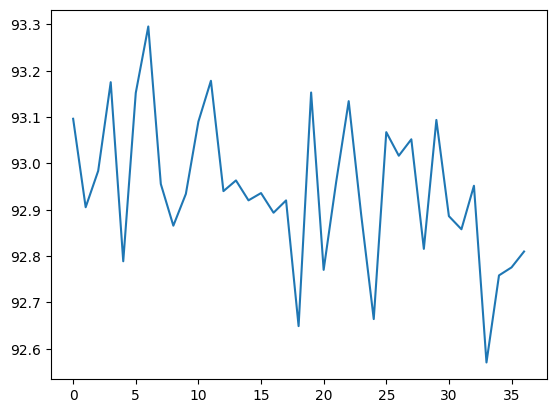

In [11]:
import matplotlib.pyplot as plt
plt.plot(df['auroc'][df['rate']==0.9][df['trial']==2].to_list())
plt.show()

In [10]:
df['auroc'][df['rate']==0.9][df['trial']==2].to_list()

[93.09628472882758,
 92.90545324963328,
 92.98395524870644,
 93.17519792010312,
 92.78886816984468,
 93.15211353571812,
 93.29537206450853,
 92.95557543519146,
 92.86567355012832,
 92.9342724712765,
 93.09018935327202,
 93.1782184389999,
 92.94020887038378,
 92.96329196269022,
 92.92030974025934,
 92.93601030123943,
 92.89363113395387,
 92.92019866859948,
 92.64903290018168,
 93.1529622304806,
 92.77038002584624,
 92.96003284791595,
 93.1342714220468,
 92.88858822052732,
 92.6642320952632,
 93.06741562493326,
 93.01659654162276,
 93.05203043751024,
 92.81566767908429,
 93.09375432543628,
 92.88625267819631,
 92.85793113150112,
 92.95182811911044,
 92.57059378463283,
 92.75844823728156,
 92.77568239892504,
 92.80994739441098]